In [2]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import chart_studio.plotly as py
import plotly.express as px
%matplotlib inline
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import cufflinks as cf
cf.go_offline()
import os
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
import warnings
warnings.filterwarnings("ignore")
#os.listdir('tele')[0]

In [2]:
#loading data
data=pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# data cleaning 

In [4]:
# change type of total charge from object to float
data['TotalCharges']=data['TotalCharges'].replace(" ",0).astype('float64')

In [5]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
#collect only catgorical columns
x=[]
for col in data:
    if data[col].dtypes=='object':
        x.append(data[col])
         
        
        
            
        
x=pd.DataFrame(x)
x        

,0,1,2,3,4,5,6,7,8,9,...,7033,7034,7035,7036,7037,7038,7039,7040,7041,7042
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU,9305-CDSKC,1452-KIOVK,6713-OKOMC,7892-POOKP,6388-TABGU,...,9767-FFLEM,0639-TSIQW,8456-QDAVC,7750-EYXWZ,2569-WGERO,6840-RESVB,2234-XADUH,4801-JZAZL,8361-LTMKD,3186-AJIEK
gender,Female,Male,Male,Male,Female,Female,Male,Female,Female,Male,...,Male,Female,Male,Female,Female,Male,Female,Female,Male,Male
Partner,Yes,No,No,No,No,No,No,No,Yes,No,...,No,No,No,No,No,Yes,Yes,Yes,Yes,No
Dependents,No,No,No,No,No,No,Yes,No,No,Yes,...,No,No,No,No,No,Yes,Yes,Yes,No,No
PhoneService,No,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Yes,...,Yes,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Yes
MultipleLines,No phone service,No,No,No phone service,No,Yes,Yes,No phone service,Yes,No,...,No,Yes,No,No phone service,No,Yes,Yes,No phone service,Yes,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic,Fiber optic,Fiber optic,DSL,Fiber optic,DSL,...,Fiber optic,Fiber optic,Fiber optic,DSL,No,DSL,Fiber optic,DSL,Fiber optic,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No,No,No,Yes,No,Yes,...,No,Yes,No,No,No internet service,Yes,No,Yes,No,Yes
OnlineBackup,Yes,No,Yes,No,No,No,Yes,No,No,Yes,...,No,Yes,No,Yes,No internet service,No,Yes,No,No,No
DeviceProtection,No,Yes,No,Yes,No,Yes,No,No,Yes,No,...,No,Yes,No,Yes,No internet service,Yes,Yes,No,No,Yes


In [7]:
# showing data in vertical state
x=x.transpose()
x

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,7590-VHVEG,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,5575-GNVDE,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,3668-QPYBK,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,7795-CFOCW,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No
4,9237-HQITU,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,Yes,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,No
7039,2234-XADUH,Female,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),No
7040,4801-JZAZL,Female,Yes,Yes,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
7041,8361-LTMKD,Male,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,Yes


In [8]:
# get dummy varibels
dum=pd.get_dummies(x[['MultipleLines','Contract','PaymentMethod','OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport','StreamingTV', 'StreamingMovies']])
dum

,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,...,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes
0,0,1,0,1,0,0,0,0,1,0,...,0,1,0,0,1,0,0,1,0,0
1,1,0,0,0,1,0,0,0,0,1,...,1,1,0,0,1,0,0,1,0,0
2,1,0,0,1,0,0,0,0,0,1,...,0,1,0,0,1,0,0,1,0,0
3,0,1,0,0,1,0,1,0,0,0,...,1,0,0,1,1,0,0,1,0,0
4,1,0,0,1,0,0,0,0,1,0,...,0,1,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,0,1,0,0,0,0,1,...,1,0,0,1,0,0,1,0,0,1
7039,0,0,1,0,1,0,0,1,0,0,...,1,1,0,0,0,0,1,0,0,1
7040,0,1,0,1,0,0,0,0,1,0,...,0,1,0,0,1,0,0,1,0,0
7041,0,0,1,1,0,0,0,0,0,1,...,0,1,0,0,1,0,0,1,0,0


In [9]:
merge=pd.concat([x,dum],axis='columns')
merge

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,...,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes
0,7590-VHVEG,Female,Yes,No,No,No phone service,DSL,No,Yes,No,...,0,1,0,0,1,0,0,1,0,0
1,5575-GNVDE,Male,No,No,Yes,No,DSL,Yes,No,Yes,...,1,1,0,0,1,0,0,1,0,0
2,3668-QPYBK,Male,No,No,Yes,No,DSL,Yes,Yes,No,...,0,1,0,0,1,0,0,1,0,0
3,7795-CFOCW,Male,No,No,No,No phone service,DSL,Yes,No,Yes,...,1,0,0,1,1,0,0,1,0,0
4,9237-HQITU,Female,No,No,Yes,No,Fiber optic,No,No,No,...,0,1,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,Yes,Yes,Yes,Yes,DSL,Yes,No,Yes,...,1,0,0,1,0,0,1,0,0,1
7039,2234-XADUH,Female,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,...,1,1,0,0,0,0,1,0,0,1
7040,4801-JZAZL,Female,Yes,Yes,No,No phone service,DSL,Yes,No,No,...,0,1,0,0,1,0,0,1,0,0
7041,8361-LTMKD,Male,Yes,No,Yes,Yes,Fiber optic,No,No,No,...,0,1,0,0,1,0,0,1,0,0


In [10]:
merge=merge.drop(columns=['MultipleLines','Contract','PaymentMethod','OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport','StreamingTV', 'StreamingMovies'],axis=1)
merge

,customerID,gender,Partner,Dependents,PhoneService,InternetService,PaperlessBilling,Churn,MultipleLines_No,MultipleLines_No phone service,...,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes
0,7590-VHVEG,Female,Yes,No,No,DSL,Yes,No,0,1,...,0,1,0,0,1,0,0,1,0,0
1,5575-GNVDE,Male,No,No,Yes,DSL,No,No,1,0,...,1,1,0,0,1,0,0,1,0,0
2,3668-QPYBK,Male,No,No,Yes,DSL,Yes,Yes,1,0,...,0,1,0,0,1,0,0,1,0,0
3,7795-CFOCW,Male,No,No,No,DSL,No,No,0,1,...,1,0,0,1,1,0,0,1,0,0
4,9237-HQITU,Female,No,No,Yes,Fiber optic,Yes,Yes,1,0,...,0,1,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,Yes,Yes,Yes,DSL,Yes,No,0,0,...,1,0,0,1,0,0,1,0,0,1
7039,2234-XADUH,Female,Yes,Yes,Yes,Fiber optic,Yes,No,0,0,...,1,1,0,0,0,0,1,0,0,1
7040,4801-JZAZL,Female,Yes,Yes,No,DSL,Yes,No,0,1,...,0,1,0,0,1,0,0,1,0,0
7041,8361-LTMKD,Male,Yes,No,Yes,Fiber optic,Yes,Yes,0,0,...,0,1,0,0,1,0,0,1,0,0


In [11]:
#converting columns of two values
le=LabelEncoder()
for col in merge.iloc[:,1:-10]:
    merge[col]=le.fit_transform(merge[col])
merge   

,customerID,gender,Partner,Dependents,PhoneService,InternetService,PaperlessBilling,Churn,MultipleLines_No,MultipleLines_No phone service,...,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes
0,7590-VHVEG,0,1,0,0,0,1,0,0,1,...,0,1,0,0,1,0,0,1,0,0
1,5575-GNVDE,1,0,0,1,0,0,0,1,0,...,1,1,0,0,1,0,0,1,0,0
2,3668-QPYBK,1,0,0,1,0,1,1,1,0,...,0,1,0,0,1,0,0,1,0,0
3,7795-CFOCW,1,0,0,0,0,0,0,0,1,...,1,0,0,1,1,0,0,1,0,0
4,9237-HQITU,0,0,0,1,1,1,1,1,0,...,0,1,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,1,1,1,1,0,1,0,0,0,...,1,0,0,1,0,0,1,0,0,1
7039,2234-XADUH,0,1,1,1,1,1,0,0,0,...,1,1,0,0,0,0,1,0,0,1
7040,4801-JZAZL,0,1,1,0,0,1,0,0,1,...,0,1,0,0,1,0,0,1,0,0
7041,8361-LTMKD,1,1,0,1,1,1,1,0,0,...,0,1,0,0,1,0,0,1,0,0


In [12]:

x['OnlineSecurity'].value_counts()

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64

In [13]:
data.columns


Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [14]:
#collecting integer columns
y=[]
for col in data:
    if data[col].dtypes== 'int64' or data[col].dtypes== 'float' :
        y.append(data[col])
y=pd.DataFrame(y)
y=y.transpose()     

In [15]:
#concatenate the numeric and catgoric columns after preprocess it
data2=pd.concat([merge,y],axis='columns')
data2

,customerID,gender,Partner,Dependents,PhoneService,InternetService,PaperlessBilling,Churn,MultipleLines_No,MultipleLines_No phone service,...,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,7590-VHVEG,0,1,0,0,0,1,0,0,1,...,1,0,0,1,0,0,0.0,1.0,29.85,29.85
1,5575-GNVDE,1,0,0,1,0,0,0,1,0,...,1,0,0,1,0,0,0.0,34.0,56.95,1889.50
2,3668-QPYBK,1,0,0,1,0,1,1,1,0,...,1,0,0,1,0,0,0.0,2.0,53.85,108.15
3,7795-CFOCW,1,0,0,0,0,0,0,0,1,...,1,0,0,1,0,0,0.0,45.0,42.30,1840.75
4,9237-HQITU,0,0,0,1,1,1,1,1,0,...,1,0,0,1,0,0,0.0,2.0,70.70,151.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,1,1,1,1,0,1,0,0,0,...,0,0,1,0,0,1,0.0,24.0,84.80,1990.50
7039,2234-XADUH,0,1,1,1,1,1,0,0,0,...,0,0,1,0,0,1,0.0,72.0,103.20,7362.90
7040,4801-JZAZL,0,1,1,0,0,1,0,0,1,...,1,0,0,1,0,0,0.0,11.0,29.60,346.45
7041,8361-LTMKD,1,1,0,1,1,1,1,0,0,...,1,0,0,1,0,0,1.0,4.0,74.40,306.60


In [16]:
data2=data2.drop(columns=['customerID','SeniorCitizen'],axis=1)
data2.columns

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'InternetService',
       'PaperlessBilling', 'Churn', 'MultipleLines_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'OnlineSecurity_No', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'OnlineBackup_No',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No', 'DeviceProtection_No internet service',
       'DeviceProtection_Yes', 'TechSupport_No',
       'TechSupport_No internet service', 'TechSupport_Yes', 'StreamingTV_No',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'tenure', 'MonthlyCharges'

# Detecting outliers and removing them

In [19]:
mini=data2['TotalCharges'].quantile(0.05)
mini

48.6

In [20]:
maxi=data2['TotalCharges'].quantile(0.95)
maxi

6921.024999999998

In [21]:
data2.shape

(7043, 38)

In [22]:
f=data2[(data2['TotalCharges']>mini) & (data2['TotalCharges']<maxi)]
f.shape

(6336, 38)

# Preprocessing


In [23]:
X=f.drop(columns=['Churn'],axis=1)
y=f['Churn']
y

1       0
2       1
3       0
4       1
5       1
       ..
7037    0
7038    0
7040    0
7041    1
7042    0
Name: Churn, Length: 6336, dtype: int32

In [24]:
#spliting data 
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)

In [25]:
# models before standrlization
models = {"Logistic Regression": LogisticRegression(), "KNN": KNeighborsClassifier(n_neighbors=8),
"Decision Tree": DecisionTreeClassifier(max_depth=9,max_features=32),"RandomForestClassifier":RandomForestClassifier(n_estimators=300,max_depth=150),"svm":svm.SVC()}
for name, model in models.items():
    model.fit(X_train, y_train)
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    y_pred = model.predict(X_test)
    \
    print("{} Train Set Accuracy: {} Test Set Accuracy: {}".format(name,train_score, test_score))
  

Logistic Regression Train Set Accuracy: 0.8068271507498027 Test Set Accuracy: 0.7917981072555205
KNN Train Set Accuracy: 0.8170876085240726 Test Set Accuracy: 0.7941640378548895
Decision Tree Train Set Accuracy: 0.8668113654301499 Test Set Accuracy: 0.7578864353312302
RandomForestClassifier Train Set Accuracy: 0.999605367008682 Test Set Accuracy: 0.7941640378548895
svm Train Set Accuracy: 0.7332280978689818 Test Set Accuracy: 0.7365930599369085


In [26]:
# models after standrlization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    train_score = model.score(X_train_scaled, y_train)
    test_score = model.score(X_test_scaled, y_test)
    print("{} Train Set Accuracy: {} Test Set Accuracy: {}".format(name,train_score, test_score))
  

Logistic Regression Train Set Accuracy: 0.8105761641673244 Test Set Accuracy: 0.8004731861198738
KNN Train Set Accuracy: 0.8178768745067088 Test Set Accuracy: 0.7689274447949527
Decision Tree Train Set Accuracy: 0.8701657458563536 Test Set Accuracy: 0.7657728706624606
RandomForestClassifier Train Set Accuracy: 0.999605367008682 Test Set Accuracy: 0.7902208201892744
svm Train Set Accuracy: 0.8202446724546172 Test Set Accuracy: 0.7996845425867508


In [27]:
#model performance
for name, model in models.items():
    y_pred = model.predict(X_test_scaled)
    cf=confusion_matrix(y_test,y_pred)
    cr=classification_report(y_test,y_pred)
    print("{} : performance{} report: {}".format(name,cf, cr))
  

Logistic Regression : performance[[826 108]
 [145 189]] report:               precision    recall  f1-score   support

           0       0.85      0.88      0.87       934
           1       0.64      0.57      0.60       334

    accuracy                           0.80      1268
   macro avg       0.74      0.73      0.73      1268
weighted avg       0.79      0.80      0.80      1268

KNN : performance[[821 113]
 [180 154]] report:               precision    recall  f1-score   support

           0       0.82      0.88      0.85       934
           1       0.58      0.46      0.51       334

    accuracy                           0.77      1268
   macro avg       0.70      0.67      0.68      1268
weighted avg       0.76      0.77      0.76      1268

Decision Tree : performance[[804 130]
 [167 167]] report:               precision    recall  f1-score   support

           0       0.83      0.86      0.84       934
           1       0.56      0.50      0.53       334

    accuracy

0.5360438400567844
Logistic Regression Text(0.5, 1.0, 'ROC Curve')


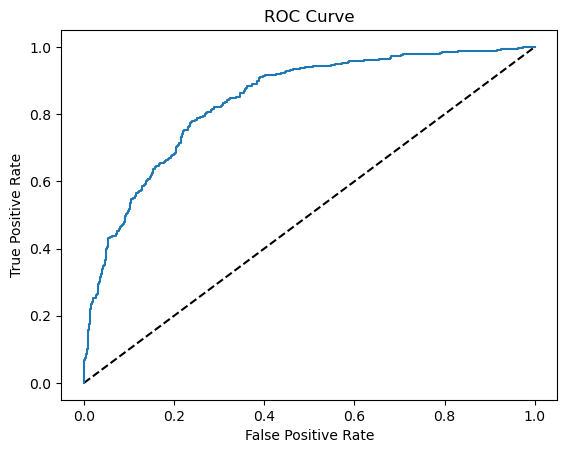

0.625
KNN Text(0.5, 1.0, 'ROC Curve')


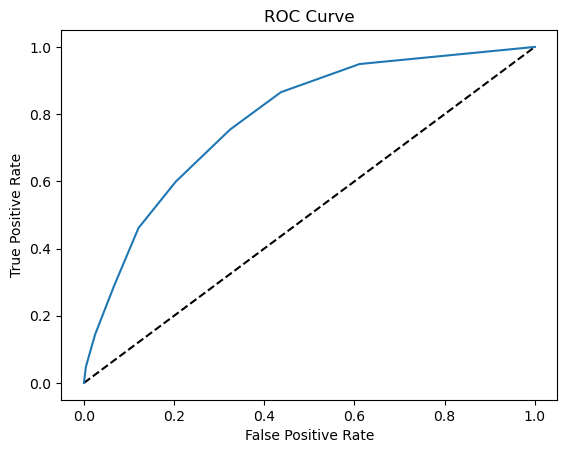

0.7111111111111111
Decision Tree Text(0.5, 1.0, 'ROC Curve')


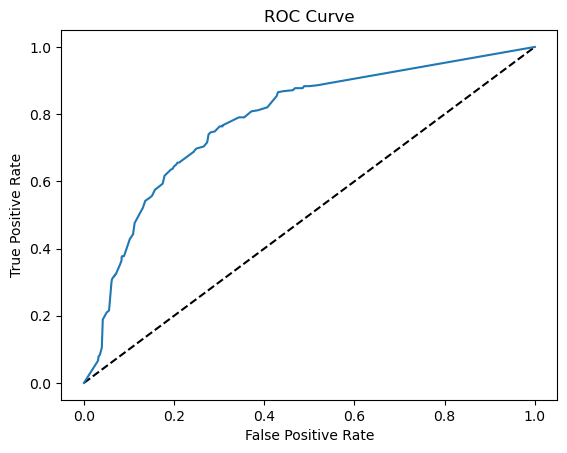

0.45666666666666667
RandomForestClassifier Text(0.5, 1.0, 'ROC Curve')


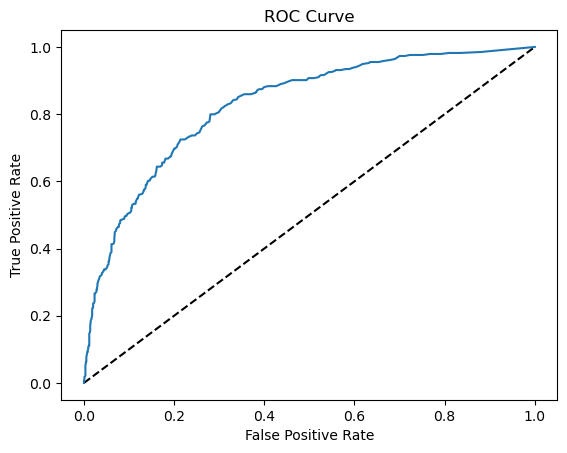

In [35]:
# ROC CURVE  for models
models1 = {"Logistic Regression": LogisticRegression(), "KNN": KNeighborsClassifier(n_neighbors=8),
"Decision Tree": DecisionTreeClassifier(max_depth=9,max_features=32),"RandomForestClassifier":RandomForestClassifier(n_estimators=300,max_depth=150)}
for name, model in models1.items():
    model.fit(X_train_scaled, y_train)
    y_pred_probs = model.predict_proba(X_test_scaled)[:, 1]
    print(y_pred_probs[0])
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    print("{}".format(name),plt.title("ROC Curve"))
    plt.show()
#log=LogisticRegression()
#log.fit(X_train_scaled, y_train)
#y_pred_probs = log.predict_proba(X_test_scaled)[:, 1]
#print(y_pred_probs[0])

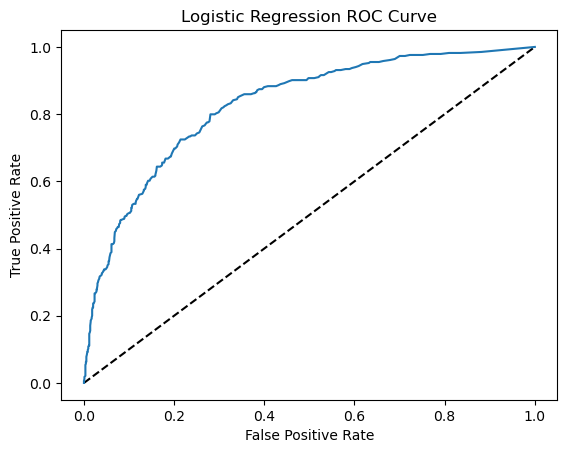

In [36]:
#roc and Auc curve for logistic regression
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.show()

In [36]:
print(roc_auc_score(y_test, y_pred_probs))

0.8406089320288759


C:\Users\ALmasria\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\ALmasria\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `k

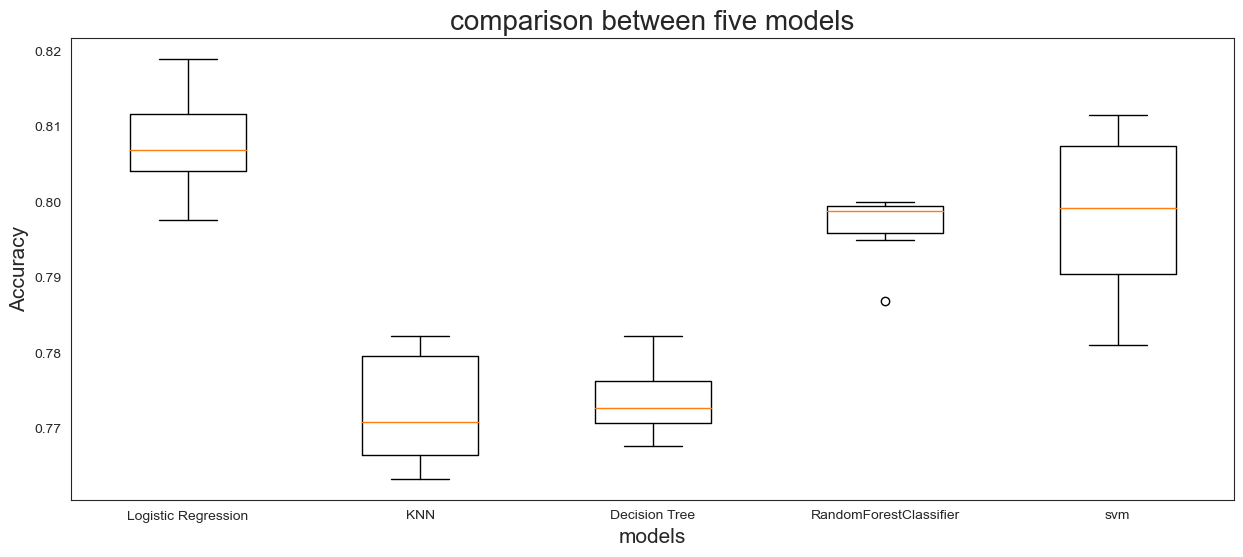

In [42]:
# comparison between five models
results = []
for model in models.values():
    
    kf = KFold(n_splits=6, random_state=10,shuffle=True)
    cv_results = cross_val_score(model, X_train_scaled, y_train, cv=kf)
    results.append(cv_results)
plt.figure(figsize=(15,6))
plt.title('comparison between five models', fontsize=20)
plt.xlabel('models', fontsize=15) 
plt.ylabel('Accuracy', fontsize=15)
plt.boxplot(results,labels=models.keys())
plt.show()


# Saving our model

In [105]:

import pickle
with open ("model_pickle","wb") as f:
    for model in models.items():
        pickle.dump(model,f)
with open ("model_pickle","rb") as f:
    for model in models.items():
        mp=pickle.load(f)
    

# EDA and Some analysis

In [3]:
data=pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")


In [4]:
fig=px.histogram(data,x='TotalCharges',title="Distribution of TotalCharges")
fig.show()


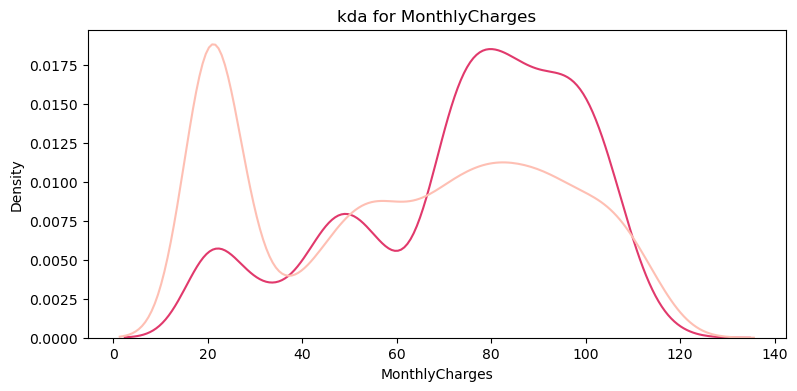

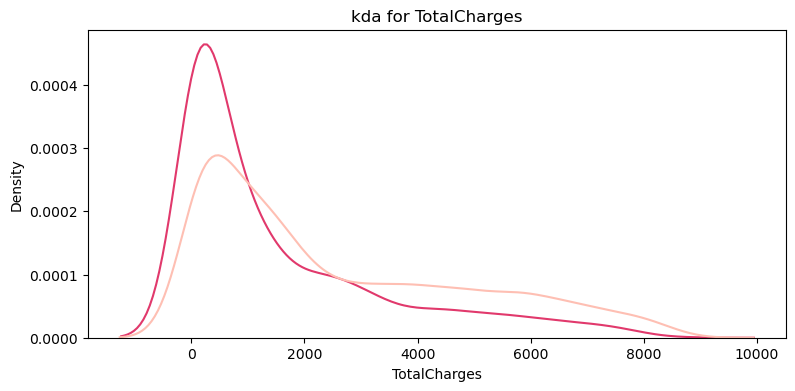

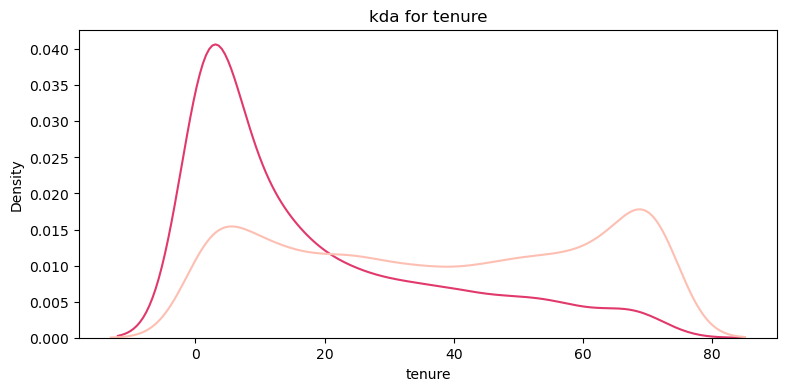

In [5]:
# change type of total charge from object to float
data['TotalCharges']=data['TotalCharges'].replace(" ",0).astype('float64')
def pdf(feature):
    plt.figure(figsize=(9,4))
    plt.title("kda for {}".format(feature))
    ax0=sns.kdeplot(data[data['Churn']=='Yes'][feature].dropna(),color='#E1396C',label="Churn:yes")
    ax1=sns.kdeplot(data[data['Churn']=='No'][feature].dropna(),color='#FEBFB3',label="Churn:no")
pdf('MonthlyCharges')  
pdf('TotalCharges')
pdf('tenure')
    

In [6]:
data['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

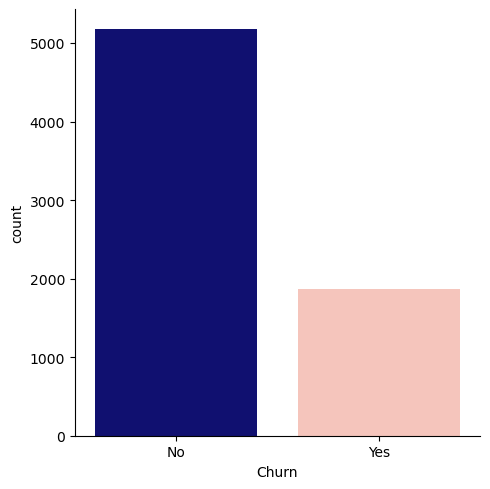

In [7]:
sns.catplot(x='Churn',kind='count',data=data,palette=['navy','#FEBFB3'])

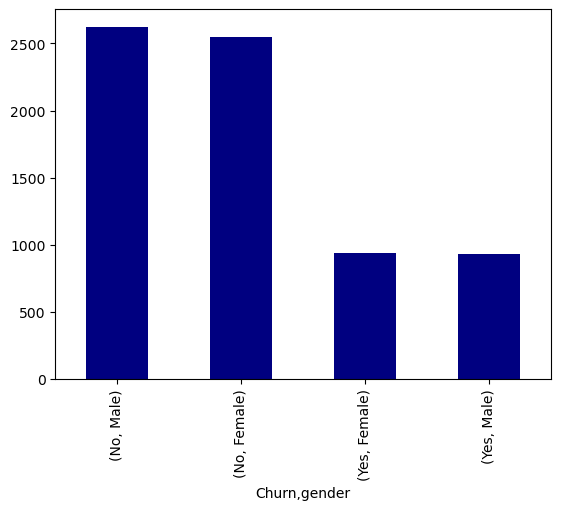

In [8]:
df=data[['Churn','gender']].value_counts().plot(kind='bar',color='navy')

In [9]:
s=data.groupby(by=['Churn','gender']).count()

<AxesSubplot:ylabel='Density'>

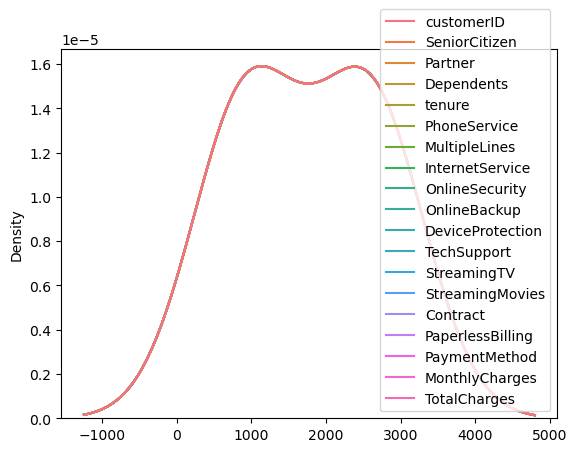

In [10]:
sns.kdeplot(data=s)

<AxesSubplot:xlabel='gender', ylabel='count'>

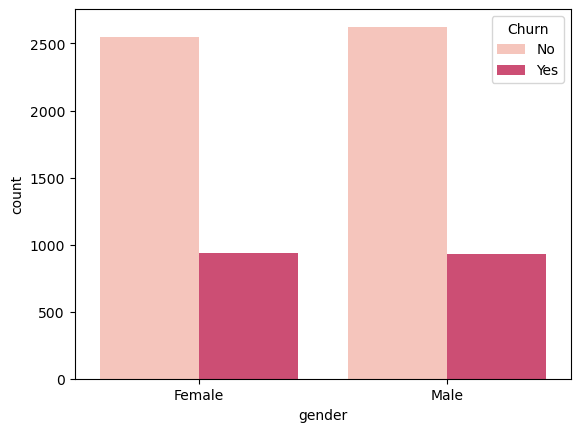

In [11]:
sns.countplot(x='gender', hue='Churn',data=data,palette=['#FEBFB3','#E1396C'])

<AxesSubplot:xlabel='SeniorCitizen,Churn,gender'>

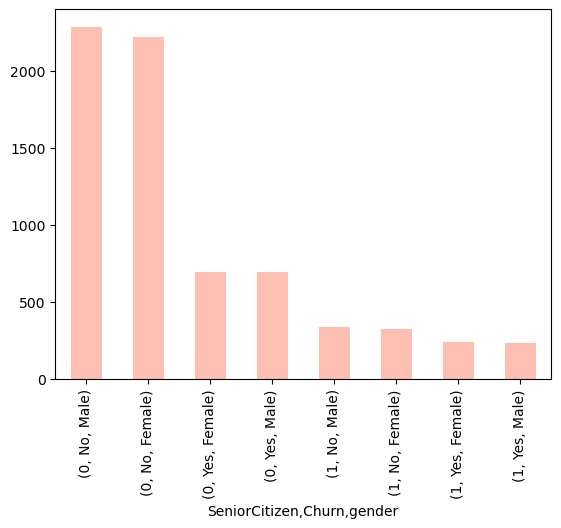

In [12]:
data[['SeniorCitizen','Churn','gender']].value_counts().plot(kind='bar',color='#FEBFB3')

In [13]:
data['Partner'].value_counts()

No     3641
Yes    3402
Name: Partner, dtype: int64

In [14]:
c=data.groupby(by=['Partner','Churn']).MonthlyCharges.count()

<AxesSubplot:xlabel='MonthlyCharges', ylabel='Density'>

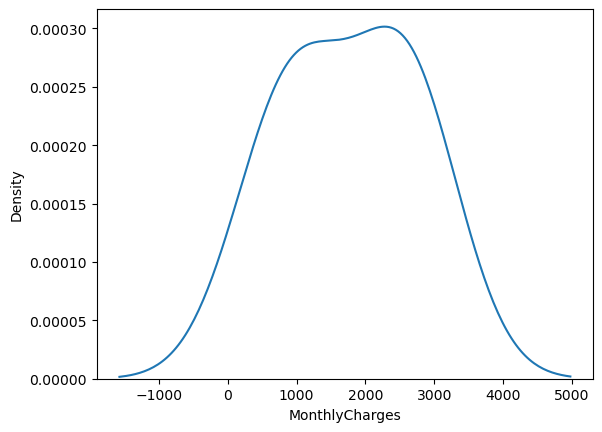

In [15]:

sns.kdeplot(data=c)

In [16]:
#piovt table
data_gender=data.pivot_table(values=["MonthlyCharges","TotalCharges"],index="gender",columns="PaymentMethod",fill_value=0,aggfunc=np.mean)

In [17]:
data_gender

MonthlyCharges                          \
PaymentMethod Bank transfer (automatic) Credit card (automatic)   
gender                                                            
Female                        67.662373               67.731782   
Male                          66.703042               65.321494   

                                                         TotalCharges  \
PaymentMethod Electronic check Mailed check Bank transfer (automatic)   
gender                                                                  
Female               75.737350     44.43117               3060.648794   
Male                 76.763431     43.43747               3090.593452   

                                                                     
PaymentMethod Credit card (automatic) Electronic check Mailed check  
gender                                                               
Female                    3108.565160      2017.955684  1082.151414  
Male                      3031.106948      2162.255314  1018.559233

In [18]:
data_churn=data.pivot_table(values=["MonthlyCharges","TotalCharges"],index="Churn",columns=["PaymentMethod","Contract"],fill_value=0,aggfunc=np.mean)

In [19]:
data_churn

MonthlyCharges                        \
PaymentMethod Bank transfer (automatic)                         
Contract                 Month-to-month   One year   Two year   
Churn                                                           
No                            65.823067  65.889943  63.954220   
Yes                           75.382836  82.293421  95.410526   

                                                                              \
PaymentMethod Credit card (automatic)                       Electronic check   
Contract               Month-to-month   One year   Two year   Month-to-month   
Churn                                                                          
No                          64.149178  65.849720  64.018398        71.746437   
Yes                         74.916573  86.454878  82.061538        77.782294   

                                                   ...  \
PaymentMethod                        Mailed check  ...   
Contract       One year   Two year Month-to-month  ...   
Churn                                              ...   
No             76.39311  84.013226      42.681342  ...   
Yes            91.04375  88.180769      53.348936  ...   

                           TotalCharges                                       \
PaymentMethod Bank transfer (automatic) Credit card (automatic)                
Contract                       Two year          Month-to-month     One year   
Churn                                                                          
No                          4083.707431             1885.440411  3227.901261   
Yes                         6082.392105             1642.755337  4483.595122   

                                                                       \
PaymentMethod              Electronic check                             
Contract          Two year   Month-to-month     One year     Two year   
Churn                                                                   
No             4024.272975      1768.714486  3700.161837  5265.557742   
Yes            5309.380769      1215.229577  4530.310938  5361.407692   

                                                        
PaymentMethod   Mailed check                            
Contract      Month-to-month     One year     Two year  
Churn                                                   
No                624.239853  1434.941083  1833.591557  
Yes               390.739894  2079.241304  2155.916667  

[2 rows x 24 columns]

In [20]:
data_InternetService=data.pivot_table(values=["tenure"],index="Churn",columns=["PaymentMethod","InternetService"],fill_value=0,aggfunc=np.mean)

In [21]:
data_InternetService

tenure                         \
PaymentMethod   Bank transfer (automatic)                          
InternetService                       DSL Fiber optic         No   
Churn                                                              
No                              46.346979    50.12854  44.070064   
Yes                             23.603774    28.13369  15.055556   

                                                                \
PaymentMethod   Credit card (automatic)                          
InternetService                     DSL Fiber optic         No   
Churn                                                            
No                            45.871648   49.955157  41.136646   
Yes                           24.416667   29.788079  14.333333   

                                                                      \
PaymentMethod   Electronic check                        Mailed check   
InternetService              DSL Fiber optic         No          DSL   
Churn                                                                  
No                     28.879819   34.825737  26.803738    25.775720   
Yes                    12.149758   17.992933  10.866667     7.503937   

                                        
PaymentMethod                           
InternetService Fiber optic         No  
Churn                                   
No                30.067568  23.480597  
Yes               10.545455   5.183099

In [22]:
#select churn whose total charge >4000
charge=data[(data["TotalCharges"]>4000)&data["Churn"]]
charge[["TotalCharges","Churn"]]

,TotalCharges,Churn
12,5681.10,No
13,5036.30,Yes
15,7895.15,No
17,7382.25,No
26,4749.15,Yes
...,...,...
7023,6479.40,No
7028,4326.25,No
7034,6886.25,Yes
7039,7362.90,No


In [72]:
px.histogram(charge,x='MultipleLines',color='Churn',color_discrete_sequence=[
                
               px.colors.qualitative.Plotly[0],px.colors.qualitative.Set3[2]]).update_layout(xaxis_title='MultipleLines',yaxis_title='Number of Churn')

In [24]:
charge[["TotalCharges","Churn"]].max()

TotalCharges    8684.8
Churn              Yes
dtype: object

In [25]:
charge1=data[(data["TotalCharges"]>5000)&(data["tenure"]>45)&(data["Churn"])]
charge1[["TotalCharges","Churn","tenure"]]

,TotalCharges,Churn,tenure
12,5681.10,No,58
13,5036.30,Yes,49
15,7895.15,No,69
17,7382.25,No,71
28,6369.45,No,72
...,...,...,...
7022,7544.30,No,72
7023,6479.40,No,63
7034,6886.25,Yes,67
7039,7362.90,No,72


In [71]:
px.histogram(charge1,x='gender', color='Churn',color_discrete_sequence=[
                
               px.colors.qualitative.Plotly[0],px.colors.qualitative.Set3[2]]).update_layout(xaxis_title='Churn',yaxis_title='Number of Churn')


In [27]:
#select columns whose churn =yes and monthly charge>200 and gender is female
gen=data[(data["MonthlyCharges"]>100)&(data["Churn"]=="Yes")&(data["gender"]=="Female")]
gen

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
117,5299-RULOA,Female,0,Yes,Yes,10,Yes,Yes,Fiber optic,Yes,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,100.25,1064.65,Yes
171,1875-QIVME,Female,0,Yes,No,2,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.40,242.80,Yes
208,7825-ECJRF,Female,0,No,No,19,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,106.60,1934.45,Yes
276,4484-GLZOU,Female,0,Yes,No,52,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,105.05,5624.85,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6918,8267-ZNYVZ,Female,0,Yes,No,33,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Electronic check,103.75,3361.05,Yes
6952,6394-MFYNG,Female,0,No,No,48,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),107.40,5121.30,Yes
6962,0886-QGENL,Female,1,Yes,No,27,Yes,No,Fiber optic,Yes,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,101.25,2754.45,Yes
6972,6664-FPDAC,Female,1,No,No,56,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,One year,Yes,Electronic check,111.95,6418.90,Yes


In [28]:
gen.sort_values(by="tenure",ascending=False)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
3890,3886-CERTZ,Female,0,Yes,No,72,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,One year,Yes,Electronic check,109.25,8109.80,Yes
5697,1984-FCOWB,Female,0,Yes,No,70,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,One year,Yes,Electronic check,109.50,7674.55,Yes
1306,0201-OAMXR,Female,0,No,No,70,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,One year,No,Credit card (automatic),115.55,8127.60,Yes
6038,1555-DJEQW,Female,0,Yes,Yes,70,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),114.20,7723.90,Yes
4395,5502-RLUYV,Female,0,Yes,Yes,69,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,103.95,7446.90,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3837,3932-CMDTD,Female,0,No,No,4,Yes,No,Fiber optic,No,...,Yes,Yes,Yes,Yes,One year,Yes,Electronic check,105.65,443.90,Yes
171,1875-QIVME,Female,0,Yes,No,2,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.40,242.80,Yes
4459,3178-FESZO,Female,0,No,No,1,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,Yes,Credit card (automatic),100.25,100.25,Yes
2208,7216-EWTRS,Female,1,Yes,No,1,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,100.80,100.80,Yes


Text(0.5, 0, 'Number of Online Services')

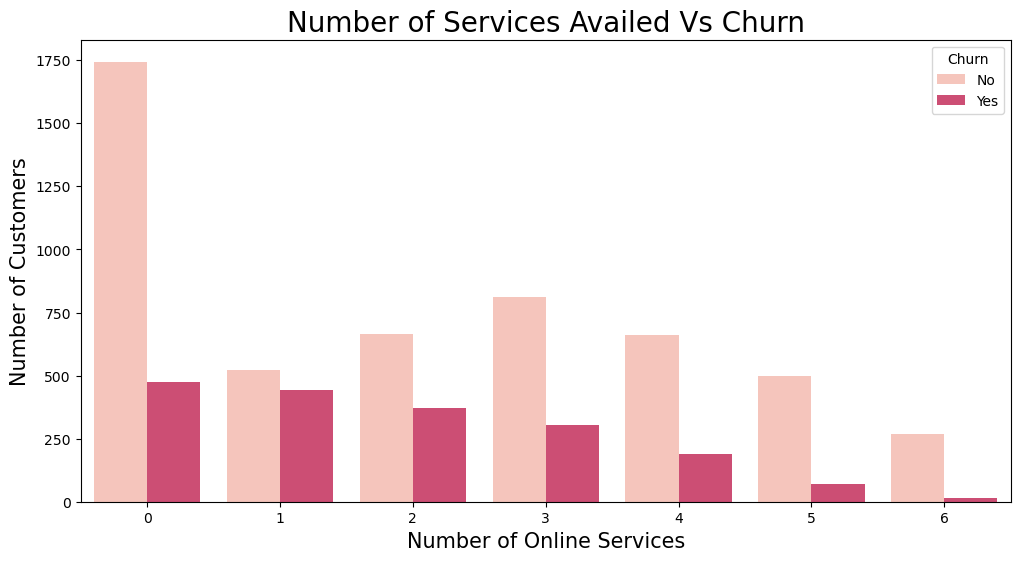

In [29]:
# this code from who is churn 

data['Count_OnlineServices'] = (data[['OnlineSecurity', 'DeviceProtection', 'StreamingMovies', 'TechSupport',
       'StreamingTV', 'OnlineBackup']] == 'Yes').sum(axis=1)
plt.figure(figsize=(12,6))
ax = sns.countplot(x='Count_OnlineServices', hue='Churn', data=data,palette=['#FEBFB3','#E1396C'])

ax.set_title('Number of Services Availed Vs Churn', fontsize=20)
ax.set_ylabel('Number of Customers', fontsize=15)
ax.set_xlabel('Number of Online Services', fontsize=15)


In [30]:

fig=px.box(data,x='Churn', y='MonthlyCharges',title='Monthly Charges vs Churn')
fig.show()

In [31]:
px.box(charge,x='Churn', y='TotalCharges',color_discrete_sequence=["gold"],title='Total Charges vs Churn')

In [40]:
px.histogram(charge1,x="Churn", color="Contract",title='Contract Type vs Churn').update_layout(
    xaxis_title="Churn", yaxis_title='Number of Customers Churned'
)


In [42]:
px.histogram(data,x="Churn", color="PaymentMethod",title='PatmenMethod vs Churn').update_layout(
    xaxis_title="Churn", yaxis_title='Number of Customers Churned'
)


In [43]:
px.histogram(data,x="Churn", color="InternetService",title='Churn by Internet Method').update_layout(
    xaxis_title="Churn", yaxis_title='Number of Customers Churned'
)

<AxesSubplot:xlabel='tenure', ylabel='Density'>

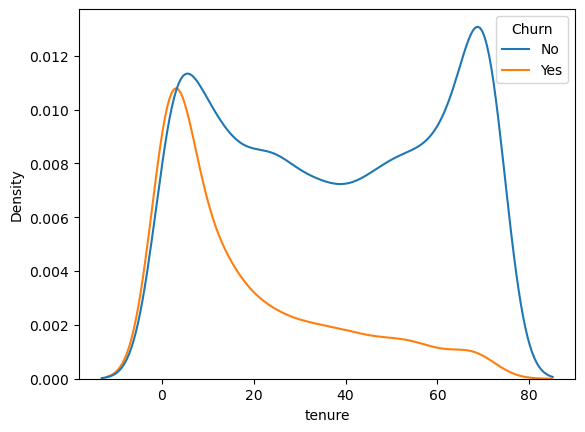

In [44]:
sns.kdeplot(data=data,hue="Churn",x="tenure")

<AxesSubplot:xlabel='TotalCharges', ylabel='Density'>

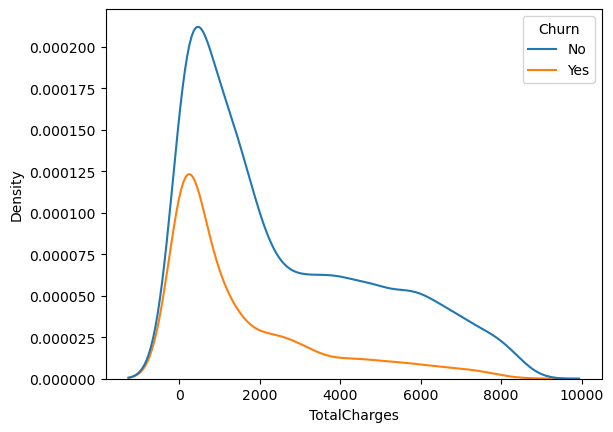

In [45]:
sns.kdeplot(data=data,hue="Churn",x="TotalCharges")

In [46]:

px.box(data,x="InternetService",y="MonthlyCharges",color="Churn")

In [47]:
px.histogram(data,x="Partner",color="Churn").update_layout(xaxis_title='Churn',yaxis_title='Number of Churn that are Partner')

In [49]:
px.scatter(data,x="MonthlyCharges",y="TotalCharges",color="Churn")

<AxesSubplot:xlabel='tenure', ylabel='MonthlyCharges'>

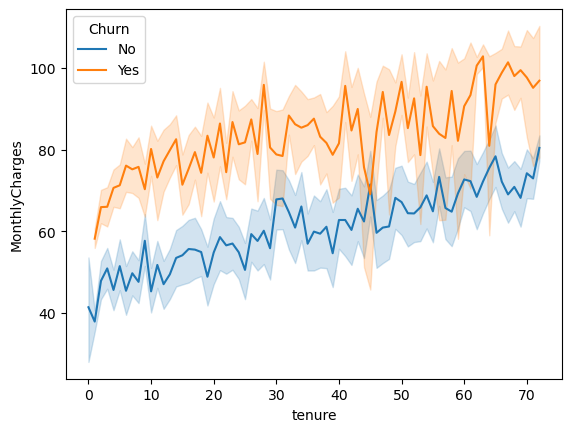

In [51]:
sns.lineplot(data=data,x="tenure",y="MonthlyCharges",hue="Churn")

<AxesSubplot:xlabel='tenure', ylabel='TotalCharges'>

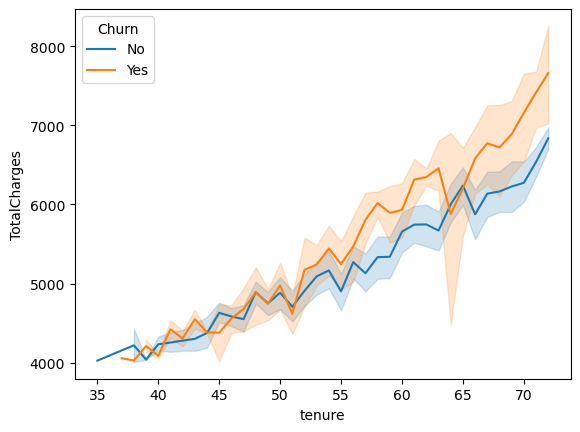

In [52]:
sns.lineplot(data=charge,x="tenure",y="TotalCharges",hue="Churn")

In [53]:
ag=data.groupby("DeviceProtection").agg({"MonthlyCharges":"sum"}).reset_index()
ag

,DeviceProtection,MonthlyCharges
0,No,218510.25
1,No internet service,32166.85
2,Yes,205439.50


In [57]:
px.bar(ag,x="DeviceProtection",y="MonthlyCharges",color="MonthlyCharges")

In [58]:
ag1=data.groupby("SeniorCitizen").agg({"MonthlyCharges":"sum"}).reset_index()
ag1

,SeniorCitizen,MonthlyCharges
0,0,364961.75
1,1,91154.85


In [59]:
px.bar(ag1,x="SeniorCitizen",y="MonthlyCharges",color="MonthlyCharges")

In [60]:
ag2=data.groupby("Churn").agg({"TotalCharges":"sum"}).reset_index()
ag2

,Churn,TotalCharges
0,No,13193241.8
1,Yes,2862926.9


In [62]:
px.bar(ag2,x="Churn",y="TotalCharges",color="TotalCharges")

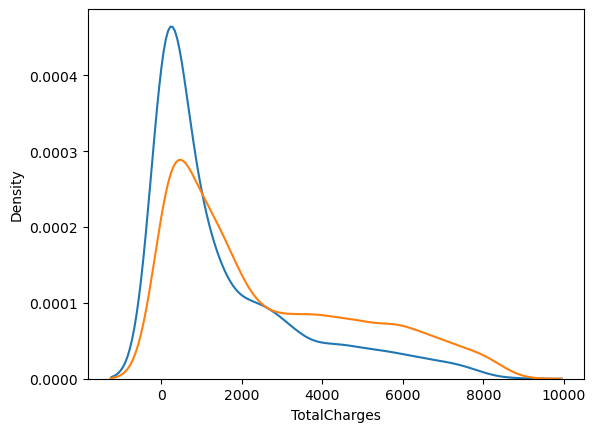

In [63]:
yes=data[data["Churn"]=="Yes"]
no=data[data["Churn"]=="No"]
ax=sns.kdeplot(data=yes,x="TotalCharges")
ax=sns.kdeplot(data=no,x="TotalCharges")
plt.show()

In [64]:
#data.head(100)

In [65]:
fig = px.bar(data, x='MonthlyCharges', y='tenure', color='tenure', orientation='h',color_discrete_sequence=["orange", "red"])

fig.show()